# Custom Layers in Keras

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__

'2.1.0'

In [6]:
import numpy as np

class Utils:
    @staticmethod
    def load_data():
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        x_train = np.reshape(x_train, (x_train.shape[0], 784)) / 255.0
        x_test = np.reshape(x_test, (x_test.shape[0], 784)) / 255.0
        y_train = tf.keras.utils.to_categorical(y_train)
        y_test = tf.keras.utils.to_categorical(y_test)
        return (x_train, y_train), (x_test, y_test)

    @staticmethod
    def plot_random_examples(x, y, p=None):
        indices = np.random.choice(range(0, x.shape[0]), 10)
        y = np.argmax(y, axis=1)
        if p is None:
            p = y

        plt.figure(figsize=(10, 5))
        for i, index in enumerate(indices):
            plt.subplot(2, 5, i+1)
            plt.imshow(x[index].reshape((28, 28)), cmap='binary')
            plt.xticks([])
            plt.yticks([])
            if(y[index] == p[index]):
                col = 'g'
            else:
                col = 'r'

            plt.xlabel(str(p[index]), color=col)

        return plt

    @staticmethod
    def plot_results(history):
        history = history.history
        plt.figure(figsize=(12, 4))
        epochs = len(history['val_loss'])
        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), history['val_loss'], label='Val Loss')
        plt.plot(range(epochs), history['loss'], label='Train Loss')
        plt.xticks(list(range(epochs)))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), history['val_accuracy'], label='Val Acc')
        plt.plot(range(epochs), history['accuracy'], label='Acc')
        plt.xticks(list(range(epochs)))
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        return plt

## Import and Visalize Dataset

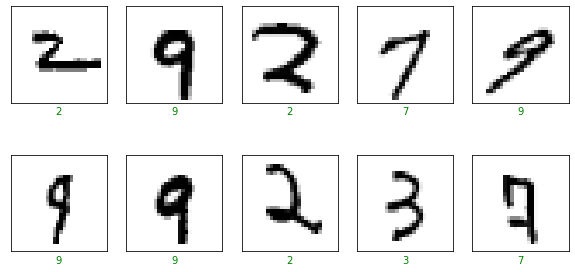

In [7]:
(x_train, y_train), (x_test, y_test) = Utils.load_data()
Utils.plot_random_examples(x_train, y_train).show()

In [13]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='alpha',
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
        
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)
    

In [14]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_shape=(784,)),
        ParametricRelu() if use_prelu else tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu_2 (Parametri (None, 64)                1         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [20]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_relu = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3010 - accuracy: 0.9151 - val_loss: 0.1766 - val_accuracy: 0.9475
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1467 - accuracy: 0.9570 - val_loss: 0.1349 - val_accuracy: 0.9595
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1072 - accuracy: 0.9680 - val_loss: 0.1128 - val_accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0864 - accuracy: 0.9737 - val_loss: 0.1029 - val_accuracy: 0.9681
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0997 - val_accuracy: 0.9704


In [22]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
parametric_relu_4 (Parametri (None, 64)                1         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [23]:
print("Intitial Alpha: ", model.layers[1].get_weights())

history_prelu = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Intitial Alpha:  [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2881 - accuracy: 0.9182 - val_loss: 0.1444 - val_accuracy: 0.9570
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1242 - accuracy: 0.9631 - val_loss: 0.1174 - val_accuracy: 0.9650
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.1013 - val_accuracy: 0.9699
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0689 - accuracy: 0.9788 - val_loss: 0.0961 - val_accuracy: 0.9716
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0913 - val_accuracy: 0.9721


## Model Comparison

<module 'matplotlib.pyplot' from '/Users/shankar/dev/tools/anaconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/pyplot.py'>

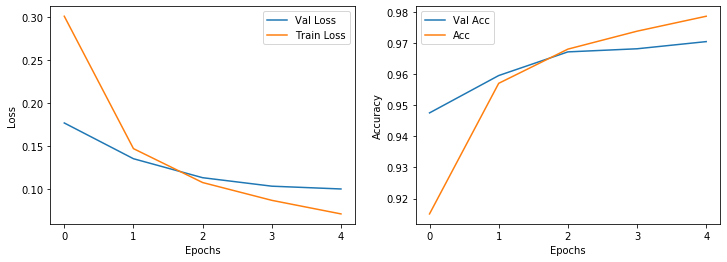

In [24]:
Utils.plot_results(history_relu)

<module 'matplotlib.pyplot' from '/Users/shankar/dev/tools/anaconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/pyplot.py'>

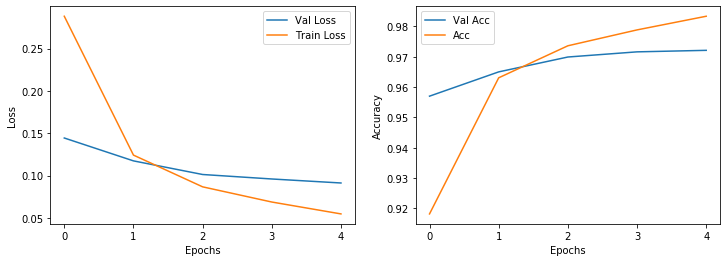

In [25]:
Utils.plot_results(history_prelu)